### Implementation of Simple Recurrent Neural Network - 2139446

### Applying Simple RNN on Sunspots Dataset

In [3]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [4]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [5]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.51161486 -0.48935324]]  wh =  [[ 0.92518413  0.37951824]
 [-0.37951824  0.92518425]]  bh =  [0. 0.]  wy = [[-0.07259274]
 [-0.3561163 ]] by =  [0.]


In [6]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 [==============================] - 0s 380ms/step
h1 =  [[-0.51161486 -0.48935324]] h2 =  [[-1.31084919 -1.62561556]] h3 =  [[-2.13067068 -3.46954481]]
Prediction from network  [[1.3902327]]
Prediction from our computation  [[1.39023265]]


In [7]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [8]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [9]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 1s - loss: 0.0443 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0122 - 391ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0081 - 382ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0067 - 363ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0059 - 381ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0054 - 432ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0050 - 365ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0048 - 378ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0044 - 370ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0042 - 378ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0040 - 384ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0039 - 379ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0038 - 384ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0036 - 374ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0036 - 365ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

In [10]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 6ms/step
Train RMSE: 0.057 RMSE
Test RMSE: 0.088 RMSE


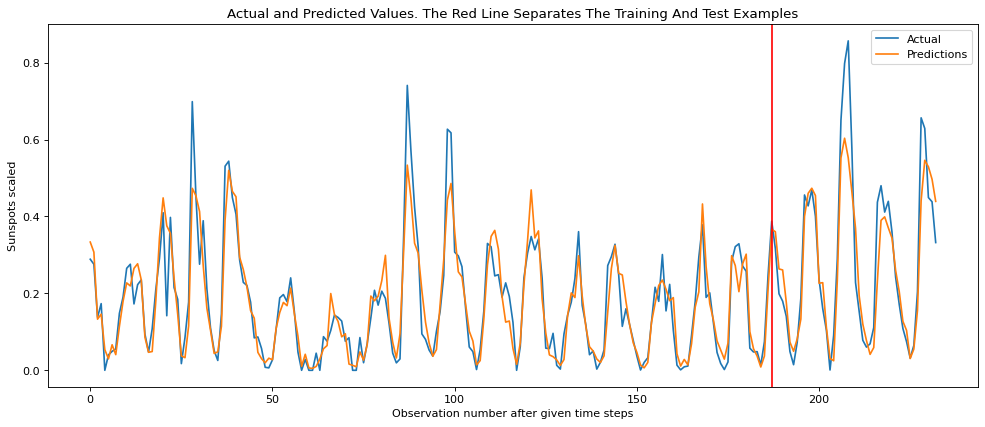

In [11]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

### Applying Simple RNN on House Property Sales Dataset

In [69]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv('House_Sale_Data.csv', usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


house_data = read_csv('House_Sale_Data.csv')
train_data, test_data, data = get_train_test(house_data)

In [70]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12  
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [71]:
model = create_RNN(hidden_units=4, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
23/23 - 1s - loss: 0.0120 - 769ms/epoch - 33ms/step
Epoch 2/50
23/23 - 0s - loss: 0.0101 - 52ms/epoch - 2ms/step
Epoch 3/50
23/23 - 0s - loss: 0.0092 - 56ms/epoch - 2ms/step
Epoch 4/50
23/23 - 0s - loss: 0.0085 - 57ms/epoch - 2ms/step
Epoch 5/50
23/23 - 0s - loss: 0.0078 - 57ms/epoch - 2ms/step
Epoch 6/50
23/23 - 0s - loss: 0.0073 - 55ms/epoch - 2ms/step
Epoch 7/50
23/23 - 0s - loss: 0.0066 - 54ms/epoch - 2ms/step
Epoch 8/50
23/23 - 0s - loss: 0.0064 - 63ms/epoch - 3ms/step
Epoch 9/50
23/23 - 0s - loss: 0.0059 - 80ms/epoch - 3ms/step
Epoch 10/50
23/23 - 0s - loss: 0.0056 - 55ms/epoch - 2ms/step
Epoch 11/50
23/23 - 0s - loss: 0.0053 - 51ms/epoch - 2ms/step
Epoch 12/50
23/23 - 0s - loss: 0.0050 - 53ms/epoch - 2ms/step
Epoch 13/50
23/23 - 0s - loss: 0.0047 - 59ms/epoch - 3ms/step
Epoch 14/50
23/23 - 0s - loss: 0.0045 - 54ms/epoch - 2ms/step
Epoch 15/50
23/23 - 0s - loss: 0.0042 - 53ms/epoch - 2ms/step
Epoch 16/50
23/23 - 0s - loss: 0.0040 - 58ms/epoch - 3ms/step
Epoch 17/50
23/

In [72]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 17ms/step
Train RMSE: 0.037 RMSE
Test RMSE: 0.026 RMSE


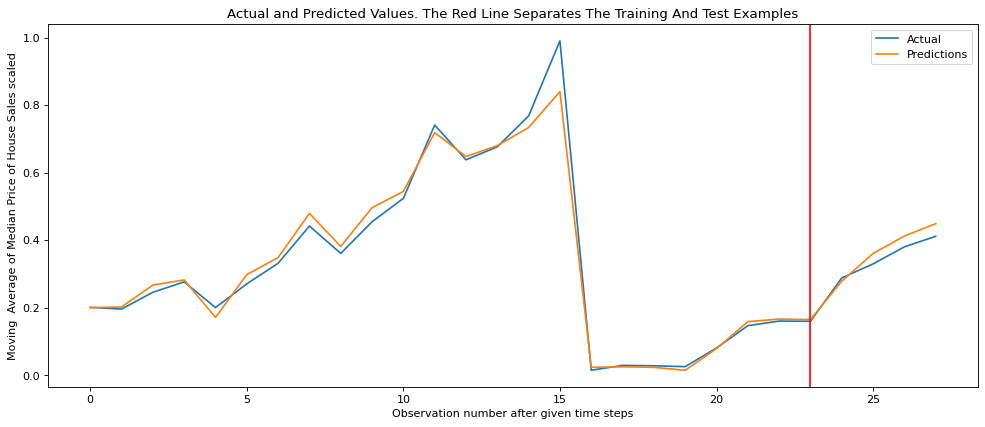

In [73]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Moving  Average of Median Price of House Sales scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

### Applying Simple RNN on Sine Wave

Populating the interactive namespace from numpy and matplotlib


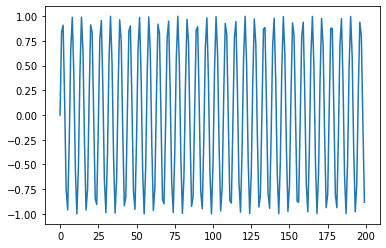

In [35]:
%pylab inline
import pandas as pd
import math
sin_wave = np.array([math.sin(x) for x in np.arange(200)])
plt.plot(sin_wave[:200])
df=pd.DataFrame(sin_wave)
df.to_csv('sin_wave.csv',index=False)

In [79]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv('sin_wave.csv', usecols=[0], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


house_data = read_csv('sin_wave.csv')
train_data, test_data, data = get_train_test(house_data)

In [80]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12  
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [81]:
model = create_RNN(hidden_units=5, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
13/13 - 1s - loss: 0.6808 - 740ms/epoch - 57ms/step
Epoch 2/50
13/13 - 0s - loss: 0.4243 - 33ms/epoch - 3ms/step
Epoch 3/50
13/13 - 0s - loss: 0.2726 - 35ms/epoch - 3ms/step
Epoch 4/50
13/13 - 0s - loss: 0.2040 - 33ms/epoch - 3ms/step
Epoch 5/50
13/13 - 0s - loss: 0.1725 - 34ms/epoch - 3ms/step
Epoch 6/50
13/13 - 0s - loss: 0.1503 - 34ms/epoch - 3ms/step
Epoch 7/50
13/13 - 0s - loss: 0.1377 - 38ms/epoch - 3ms/step
Epoch 8/50
13/13 - 0s - loss: 0.1290 - 43ms/epoch - 3ms/step
Epoch 9/50
13/13 - 0s - loss: 0.1237 - 54ms/epoch - 4ms/step
Epoch 10/50
13/13 - 0s - loss: 0.1196 - 33ms/epoch - 3ms/step
Epoch 11/50
13/13 - 0s - loss: 0.1153 - 37ms/epoch - 3ms/step
Epoch 12/50
13/13 - 0s - loss: 0.1122 - 36ms/epoch - 3ms/step
Epoch 13/50
13/13 - 0s - loss: 0.1089 - 35ms/epoch - 3ms/step
Epoch 14/50
13/13 - 0s - loss: 0.1072 - 42ms/epoch - 3ms/step
Epoch 15/50
13/13 - 0s - loss: 0.1036 - 37ms/epoch - 3ms/step
Epoch 16/50
13/13 - 0s - loss: 0.1001 - 46ms/epoch - 4ms/step
Epoch 17/50
13/

In [82]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 19ms/step
Train RMSE: 0.111 RMSE
Test RMSE: 0.208 RMSE


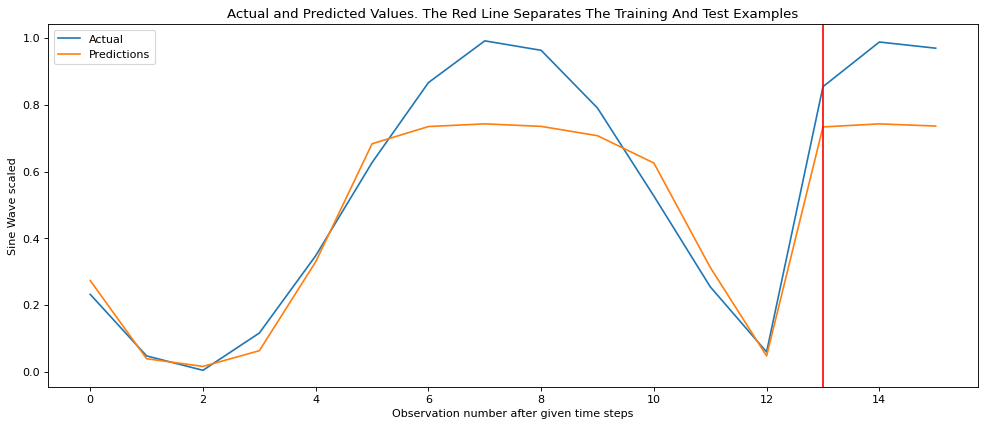

In [83]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sine Wave scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)